# Regresión lineal demanda de bicis por estación por mes

## Merge de las bases de datos para todos los meses

In [1]:
# Importar librerías ------------------------------------
import numpy as np 
import pandas as pd

In [3]:
# Leer las bases de datos ----------------------------------------------------------
mes = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre"]
datasets = []

for m in mes:
    dataset = pd.read_csv("data/" + m + ".csv", encoding='iso-8859-1')
    datasets.append(dataset)

# Juntar todas las bases de datos leídas ----------------------------------------------
new_data = pd.concat(datasets)

In [4]:
new_data.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,A}äe_nacimiento
0,26751198,1350606,M,1983.0,2023-01-01 00:00:41,2023-01-01 00:26:52,154,50,NaN
1,26751199,15163,M,1986.0,2023-01-01 00:04:48,2023-01-01 00:07:46,64,79,NaN
2,26751200,1534764,M,1987.0,2023-01-01 00:06:49,2023-01-01 00:17:36,35,12,NaN
3,26751201,1240140,M,1996.0,2023-01-01 00:08:05,2023-01-01 00:09:00,35,35,NaN
4,26751202,1732214,M,1969.0,2023-01-01 00:09:14,2023-01-01 00:14:57,54,171,NaN


In [5]:
# Eliminar columnas innecesarias ---------------------------------------------------------
new_data.drop(['Genero', 'Año_de_nacimiento','A}äe_nacimiento', 'Fin_del_viaje', 'Viaje_Id', 'Usuario_Id'], axis=1, inplace = True)

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3211104 entries, 0 to 363858
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Inicio_del_viaje  object
 1   Origen_Id         int64 
 2   Destino_Id        int64 
dtypes: int64(2), object(1)
memory usage: 98.0+ MB


In [7]:
# Convertir columnas tipo string a tipo datetime ------------------------------
new_data['Inicio_del_viaje'] = pd.to_datetime(new_data['Inicio_del_viaje'])
new_data['Inicio_del_viaje'] = new_data['Inicio_del_viaje'].dt.strftime('%B')

In [9]:
new_data

,Inicio_del_viaje,Origen_Id,Destino_Id
0,January,154,50
1,January,64,79
2,January,35,12
3,January,35,35
4,January,54,171
...,...,...,...
363854,September,310,131
363855,September,45,157
363856,September,188,197
363857,September,255,255


In [19]:
new_data.groupby('Inicio_del_viaje').mean()

,Origen_Id,Destino_Id
Inicio_del_viaje,,
April,136.694323,136.140931
August,137.751180,137.565590
February,138.575897,138.614828
January,137.657612,137.565713
July,135.715236,135.161188
June,136.610253,136.531202
March,138.617169,138.445622
May,138.012876,137.981475
September,137.898051,137.410791


In [27]:
new_data.groupby('Origen_Id').count()

,Inicio_del_viaje,Destino_Id
Origen_Id,,
2,15530,15530
3,12923,12923
4,19204,19204
5,13518,13518
6,8300,8300
...,...,...
323,8411,8411
324,6536,6536
325,3164,3164


In [20]:
new_data.groupby('Inicio_del_viaje').value_counts(normalize=True)

Inicio_del_viaje  Origen_Id  Destino_Id
April             288        291           0.001546
                  51         51            0.001495
                  271        271           0.001282
                  11         11            0.001231
                  291        288           0.001150
                                             ...   
September         39         277           0.000003
                  219        65            0.000003
                  46         183           0.000003
                  254        29            0.000003
                  248        284           0.000003
Length: 321841, dtype: float64

### Ejemplo de regresión para estación 154

In [21]:
enero = new_data[new_data['Inicio_del_viaje'] == 'January']
enero

,Inicio_del_viaje,Origen_Id,Destino_Id
0,January,154,50
1,January,64,79
2,January,35,12
3,January,35,35
4,January,54,171
...,...,...,...
366013,January,215,198
366014,January,63,52
366015,January,80,81
366016,January,289,111


In [61]:
frecuencia_origen = enero['Origen_Id'].value_counts()
frecuencia_origen = frecuencia_origen.reset_index()
frecuencia_origen.sort_values('index', inplace = True)
frecuencia_origen

,index,Origen_Id
130,2,1130
102,3,1344
37,4,2178
79,5,1506
167,6,888
...,...,...
150,323,999
186,324,739
248,325,390
237,326,449


In [62]:
frecuencia_destino = enero['Destino_Id'].value_counts()
frecuencia_destino = frecuencia_destino.reset_index()
frecuencia_destino.sort_values('index', inplace = True)
frecuencia_destino

,index,Destino_Id
114,2,1223
118,3,1200
44,4,1991
86,5,1491
121,6,1185
...,...,...
90,323,1447
145,324,1034
258,325,255
191,326,647


In [81]:
frecuencias = pd.concat([frecuencia_origen['index'], frecuencia_origen['Origen_Id'],
                         frecuencia_destino['Destino_Id']], axis = 1)
                        
#frecuencias.drop('0', axis = 1, inplace = True)

frecuencias.reset_index(inplace = True)

frecuencias

,level_0,index,Origen_Id,Destino_Id
0,130,2,1130,1145
1,102,3,1344,1344
2,37,4,2178,2219
3,79,5,1506,1575
4,167,6,888,875
...,...,...,...,...
295,150,323,999,997
296,186,324,739,697
297,248,325,390,313
298,237,326,449,392


In [86]:
frecuencias.head(9)

,level_0,index,Origen_Id,Destino_Id
0,130,2,1130,1145
1,102,3,1344,1344
2,37,4,2178,2219
3,79,5,1506,1575
4,167,6,888,875
5,177,8,772,795
6,68,9,1676,1694
7,75,10,1582,1625
8,1,11,5726,5867


In [95]:
((888 / 4) / 7) / 19

1.669172932330827

In [96]:
((875 / 4) / 7) / 19

1.644736842105263

In [87]:
(((5726 / 4) / 7)# + ((5867 / 4) / 7) ) / 2

SyntaxError: unexpected EOF while parsing (3512190586.py, line 1)

In [97]:
4.285714285714286 / 19

0.22556390977443608

In [130]:
num_estaciones = len(frecuencias)
from math import ceil
def al_dia(n):
    b = ((n / 4) / 7) / 19
    
    if b < 5:
        return 5
    else:
        return ceil(b)

num_bicis = [ceil((al_dia(frecuencias['Origen_Id'][x]) + al_dia(frecuencias['Destino_Id'][x])) / 2) for x in range(num_estaciones)]

In [131]:
ceil(11.028195488721805)

12

In [132]:
num_bicis

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 12,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 7,
 11,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 10,
 19,
 11,
 5,
 10,
 5,
 6,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1

In [133]:
sum(num_bicis)

1573

In [104]:
(((1130 / 4) / 7) + ((1145 / 4) / 7) ) / 2

40.625

In [65]:
(1521 / 4) / 7

54.32142857142857

In [55]:
frecuencia_origen = frecuencia_origen.reset_index()
frecuencia_origen

,index,Origen_Id
0,51,8516
1,11,5726
2,35,5567
3,52,5390
4,271,5330
...,...,...
295,240,106
296,101,99
297,95,92
298,146,86


In [59]:
frecuencia_origen.sort_values('index', inplace = True)

In [60]:
frecuencia_origen

,index,Origen_Id
130,2,1130
102,3,1344
37,4,2178
79,5,1506
167,6,888
...,...,...
150,323,999
186,324,739
248,325,390
237,326,449


In [45]:
frecuencia_origen = enero['Origen_Id'].value_counts()

viajes_origen = [pd.Series(data = frecuencia_origen[x], index=[x]) for x in enero['Origen_Id']]
viajes_origen

KeyboardInterrupt: 

In [42]:
viajes_destino = enero['Destino_Id'].value_counts()
viajes_destino

51     10118
35      5867
52      5468
11      5306
50      5256
       ...  
95        80
240       78
101       74
146       50
104       41
Name: Destino_Id, Length: 300, dtype: int64

In [35]:
sum(viajes)

366018

In [36]:
8516* 3200 / 366018

74.45316896983209

In [37]:
82 * 3200 / 366018

0.7169046331054757

In [40]:
(8516 / 4) / 7

304.14285714285717

In [17]:
len([x for x in range(len(estacion_154)) if estacion_154['Inicio_del_viaje'][x] == 'January'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:
demanda = estacion_154.groupby('Inicio_del_viaje').mean()

demanda

,Origen_Id,Destino_Id
Inicio_del_viaje,,
April,154.0,172.694643
August,154.0,167.822882
February,154.0,170.322235
January,154.0,173.855376
July,154.0,161.932851
June,154.0,171.933689
March,154.0,173.602078
May,154.0,172.295808
September,154.0,165.762860


In [ ]:
demanda[]

In [36]:
estacion_154 = estacion_154.groupby(['Inicio_del_viaje']).count()
estacion_154.reset_index(inplace=True)
dummies = pd.get_dummies(estacion_154['Inicio_del_viaje'], prefix='Mes')

# Concatena los nuevos datos dummy con tu DataFrame original
estacion_154 = pd.concat([estacion_154, dummies], axis=1)

# Elimina la columna original "Mes" si ya no la necesitas
estacion_154 = estacion_154.drop('Inicio_del_viaje', axis=1)
estacion_154

,Origen_Id,Destino_Id,Mes_April,Mes_August,Mes_February,Mes_January,Mes_July,Mes_June,Mes_March,Mes_May,Mes_September
0,1680,1680,1,0,0,0,0,0,0,0,0
1,1818,1818,0,1,0,0,0,0,0,0,0
2,1682,1682,0,0,1,0,0,0,0,0,0
3,1860,1860,0,0,0,1,0,0,0,0,0
4,1519,1519,0,0,0,0,1,0,0,0,0
5,1689,1689,0,0,0,0,0,1,0,0,0
6,1925,1925,0,0,0,0,0,0,1,0,0
7,1670,1670,0,0,0,0,0,0,0,1,0
8,1944,1944,0,0,0,0,0,0,0,0,1


In [37]:
import statsmodels.formula.api as smf


modelo=smf.ols(formula='Origen_Id~Mes_April+Mes_August+Mes_February+Mes_January+Mes_July+Mes_June+Mes_March+Mes_May+Mes_September',data=estacion_154)

modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Origen_Id   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                nan
Time:                        18:04:20   Log-Likelihood:                 241.35
No. Observations:                   9   AIC:                            -464.7
Df Residuals:                       0   BIC:                            -462.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1578.7000        inf          0

C:\Users\Alejandra Velasco\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Alejandra Velasco\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Alejandra Velasco\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Alejandra Velasco\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [38]:
LRresult = (modelo.summary().tables[1])

summary = pd.DataFrame(LRresult)

y_p = float(str(summary[1][1]))

for x in range(2,len(summary)): 
    y_p += float(str(summary[1][x]))*estacion_154[str(summary[0][x])]
y_p

tabla = pd.DataFrame({'Real': estacion_154['Origen_Id'],
                    'Prediccion':y_p,'Errores': y_p - estacion_154['Origen_Id']})

tabla.head()

C:\Users\Alejandra Velasco\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Real,Prediccion,Errores
0,1680,1680.0,0.0
1,1818,1818.0,0.0
2,1682,1682.0,0.0
3,1860,1860.0,0.0
4,1519,1519.0,0.0


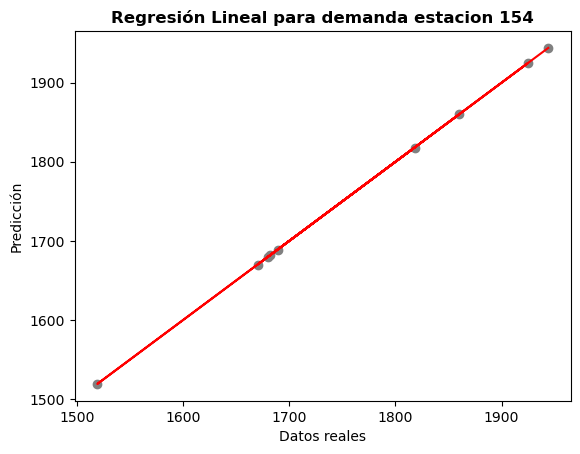

In [39]:
import matplotlib.pyplot as plt

plt.scatter(estacion_154['Origen_Id'],y_p,color='gray')
plt.plot(estacion_154['Origen_Id'],estacion_154['Origen_Id'],color='red')
plt.title("Regresión Lineal para demanda estacion 154", weight = 'bold')
plt.xlabel("Datos reales")
plt.ylabel("Predicción");